【習得必須】機械学習を驚くほど簡単に実装できるPyCaretをわかりやすく解説 - YouTube
https://www.youtube.com/watch?v=35pS0YgMsAo

*

*   00:00 イントロ
*   00:28 概要説明
*   01:23 PyCaretのインストール
*   05:43 データの前処理
*   10:26 モデリング（手法の比較）
*   15:37 ハイパーパラメータチューニング
*   17:29 学習済みモデルで予測
*   18:34 結果のプロット
*   20:53 エンディング



In [1]:
!pip install pycaret

     |████████████████████████████████| 288 kB 5.2 MB/s 
     |████████████████████████████████| 167 kB 40.7 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 6.8 MB 31.8 MB/s 
     |████████████████████████████████| 86 kB 4.6 MB/s 
     |████████████████████████████████| 1.3 MB 52.3 MB/s 
     |████████████████████████████████| 2.0 MB 50.5 MB/s 
     |████████████████████████████████| 261 kB 52.2 MB/s 
     |████████████████████████████████| 15.5 MB 19.2 MB/s 
     |████████████████████████████████| 1.7 MB 41.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 113 kB 44.3 MB/s 
     |████████████████████████████████| 675 kB 39.1 MB/s 
     |████████████████████████████████| 62 kB 790 kB/s 
     |████████████████████████████████| 10.1 MB 36.9 MB/s 
     |██████████████████

In [2]:
from pycaret.regression import *
from pycaret.datasets import get_data

In [3]:
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [4]:
# 目標値を設定
exp = setup(dataset,target='Price', silent=True)

,Description,Value
0,session_id,1402
1,Target,Price
2,Original Data,"(6000, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4199, 28)"


In [5]:
## Modeling(モデルを比較)
compare_models()

## 結果はチューニングしていないことに注意

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,784.3242,2.796679e+06,1.641405e+03,0.9739,0.0827,0.0606,1.404
rf,Random Forest Regressor,783.7348,3.060241e+06,1.720715e+03,0.9709,0.0821,0.0595,1.262
lightgbm,Light Gradient Boosting Machine,769.3424,3.220359e+06,1.762214e+03,0.9698,0.0782,0.0566,0.117
gbr,Gradient Boosting Regressor,918.1671,3.374097e+06,1.825238e+03,0.9676,0.1034,0.0773,0.260
dt,Decision Tree Regressor,1015.6781,5.456926e+06,2.284643e+03,0.9489,0.1076,0.0764,0.032
lasso,Lasso Regression,2483.1805,1.439981e+07,3.770650e+03,0.8626,0.6238,0.2922,0.047
lr,Linear Regression,2491.8705,1.440757e+07,3.771670e+03,0.8625,0.6486,0.2931,0.326
llar,Lasso Least Angle Regression,2425.4363,1.443757e+07,3.773276e+03,0.8625,0.6327,0.2781,0.021
br,Bayesian Ridge,2486.6461,1.441015e+07,3.772156e+03,0.8625,0.6250,0.2929,0.023
ridge,Ridge Regression,2487.7809,1.444717e+07,3.776992e+03,0.8622,0.6287,0.2931,0.017


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=1402, verbose=0, warm_start=False)

In [6]:
## 交差検証(上位いくつかはした方がよい)
model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,831.1173,5.488145e+06,2342.6789,0.9536,0.0849,0.0602
1,841.2981,2.879264e+06,1696.8395,0.9759,0.0794,0.0599
2,618.7624,1.503195e+06,1226.0487,0.9797,0.0804,0.0573
3,727.4232,1.754211e+06,1324.4665,0.9802,0.0800,0.0596
4,770.6230,2.105979e+06,1451.1992,0.9741,0.0856,0.0619
5,784.6550,2.341324e+06,1530.1386,0.9756,0.0868,0.0632
6,767.5428,2.624893e+06,1620.1522,0.9760,0.0778,0.0574
7,785.1593,2.426696e+06,1557.7856,0.9779,0.0819,0.0611
8,873.6180,4.348388e+06,2085.2789,0.9679,0.0858,0.0610
9,843.0432,2.494691e+06,1579.4592,0.9776,0.0849,0.0643


In [7]:
print(model)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=1402, verbose=0, warm_start=False)


In [8]:
## ハイパーパラメータチューニング
tuned_model = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1075.5992,7.260144e+06,2694.4655,0.9386,0.1055,0.0769
1,1101.1744,6.843554e+06,2616.0187,0.9428,0.1038,0.0760
2,988.2352,4.166564e+06,2041.2162,0.9439,0.1154,0.0837
3,997.9751,3.661673e+06,1913.5498,0.9587,0.1094,0.0807
4,967.2709,3.203462e+06,1789.8219,0.9606,0.1093,0.0778
5,1016.4959,4.523500e+06,2126.8521,0.9529,0.1130,0.0820
6,1033.7964,5.126022e+06,2264.0720,0.9532,0.1058,0.0781
7,1083.0324,4.350171e+06,2085.7063,0.9604,0.1139,0.0839
8,1053.8163,5.582100e+06,2362.6468,0.9588,0.1005,0.0737
9,1213.8326,7.666389e+06,2768.8245,0.9312,0.1252,0.0860


In [9]:
## Predict
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1012.3686,4.878006e+06,2208.6209,0.9519,0.1084,0.0775


,Carat Weight,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,Color_G,Color_H,Color_I,Clarity_FL,Clarity_IF,Clarity_SI1,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_EX,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA,Price,Label
0,0.90,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3848,4041.494444
1,1.01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4553,4994.516667
2,1.01,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,5972,6437.716667
3,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7572,8664.866667
4,1.18,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,11573,10455.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,0.81,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3342,3403.788889
1797,2.48,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,50585,42142.522222
1798,2.07,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,26894,29576.161111
1799,0.76,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3864,3714.738889


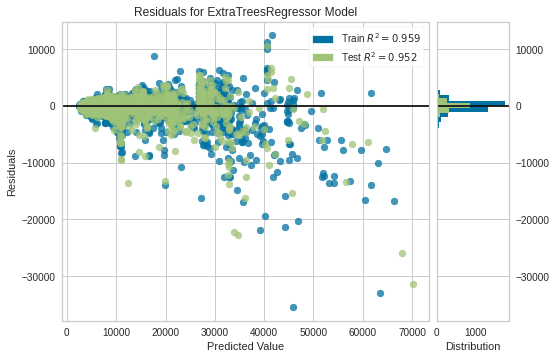

In [10]:
## 結果プロット
plot_model(tuned_model)

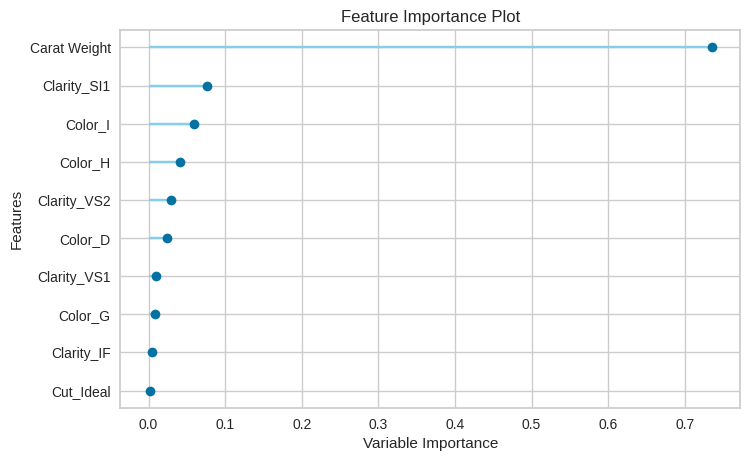

In [11]:
## 結果プロット
plot_model(tuned_model,plot='feature')

In [12]:
print(dataset)

      Carat Weight              Cut Color Clarity Polish Symmetry Report  Price
0             1.10            Ideal     H     SI1     VG       EX    GIA   5169
1             0.83            Ideal     H     VS1     ID       ID   AGSL   3470
2             0.85            Ideal     H     SI1     EX       EX    GIA   3183
3             0.91            Ideal     E     SI1     VG       VG    GIA   4370
4             0.83            Ideal     G     SI1     EX       EX    GIA   3171
...            ...              ...   ...     ...    ...      ...    ...    ...
5995          1.03            Ideal     D     SI1     EX       EX    GIA   6250
5996          1.00        Very Good     D     SI1     VG       VG    GIA   5328
5997          1.02            Ideal     D     SI1     EX       EX    GIA   6157
5998          1.27  Signature-Ideal     G     VS1     EX       EX    GIA  11206
5999          2.19            Ideal     E     VS1     EX       EX    GIA  30507

[6000 rows x 8 columns]


## PyCaret とは？動作確認や機能、特徴などを解説 | OSSサポートのOpenStandia™【NRI】
https://openstandia.jp/oss_info/pycaret/

In [13]:
from pycaret.datasets import get_data
data = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [14]:
from pycaret.classification import *
setup(data = data, target = 'default', session_id=123, silent=True)

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(24000, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


(<MLUsecase.CLASSIFICATION: 1>,
 Pipeline(memory=None, steps=[('empty_step', 'passthrough')], verbose=False),
 10,
 'default',
        LIMIT_BAL   AGE  BILL_AMT1  ...  PAY_6_5  PAY_6_6  PAY_6_7
 3262    140000.0  35.0    88394.0  ...      0.0      0.0      0.0
 7089     40000.0  24.0    25933.0  ...      0.0      0.0      0.0
 8472     50000.0  51.0     6700.0  ...      0.0      0.0      0.0
 4761     90000.0  29.0     6146.0  ...      0.0      0.0      0.0
 14539    50000.0  52.0    49854.0  ...      0.0      0.0      0.0
 ...          ...   ...        ...  ...      ...      ...      ...
 1096    220000.0  49.0   172184.0  ...      0.0      0.0      0.0
 16029   100000.0  41.0     2427.0  ...      0.0      0.0      0.0
 15988   240000.0  37.0     1769.0  ...      0.0      0.0      0.0
 15592   110000.0  32.0    68014.0  ...      0.0      0.0      0.0
 17118   190000.0  27.0    14671.0  ...      0.0      0.0      0.0
 
 [7201 rows x 85 columns],
 False,
 'box-cox',
 False,
 -1,
 False,

In [15]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8206,0.7652,0.3782,0.6732,0.4839,0.3857,0.4094,0.333
lightgbm,Light Gradient Boosting Machine,0.8205,0.7751,0.3782,0.6727,0.4838,0.3854,0.4091,0.428
ridge,Ridge Classifier,0.8200,0.0000,0.3561,0.6841,0.4679,0.3725,0.4015,0.048
gbc,Gradient Boosting Classifier,0.8196,0.7786,0.3590,0.6792,0.4694,0.3731,0.4007,5.230
ada,Ada Boost Classifier,0.8183,0.7729,0.3422,0.6843,0.4556,0.3610,0.3925,1.255
rf,Random Forest Classifier,0.8153,0.7614,0.3646,0.6532,0.4676,0.3666,0.3896,2.834
et,Extra Trees Classifier,0.8067,0.7346,0.3729,0.6075,0.4616,0.3520,0.3679,2.333
lr,Logistic Regression,0.7773,0.6439,0.0000,0.0000,0.0000,0.0000,0.0000,0.544
dummy,Dummy Classifier,0.7773,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.031
knn,K Neighbors Classifier,0.7486,0.5986,0.1847,0.3708,0.2463,0.1155,0.1257,0.908


In [16]:
print(best_model)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


In [17]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8292,0.7754,0.4091,0.6986,0.5160,0.4208,0.4430
1,0.8167,0.7595,0.3583,0.6634,0.4653,0.3663,0.3917
2,0.8315,0.7786,0.4439,0.6888,0.5398,0.4426,0.4586
3,0.8125,0.7570,0.3636,0.6385,0.4634,0.3600,0.3809
4,0.8196,0.7821,0.4225,0.6449,0.5105,0.4058,0.4194
5,0.8190,0.7900,0.3770,0.6651,0.4812,0.3816,0.4042
6,0.8262,0.7456,0.4037,0.6864,0.5084,0.4113,0.4327
7,0.8190,0.7717,0.3850,0.6606,0.4865,0.3858,0.4065
8,0.8095,0.7487,0.3573,0.6291,0.4558,0.3508,0.3714
9,0.8297,0.7647,0.4037,0.7056,0.5136,0.4195,0.4435


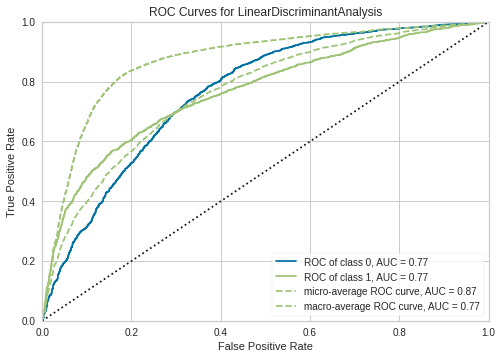

In [18]:
plot_model(tuned_model, plot = 'auc')

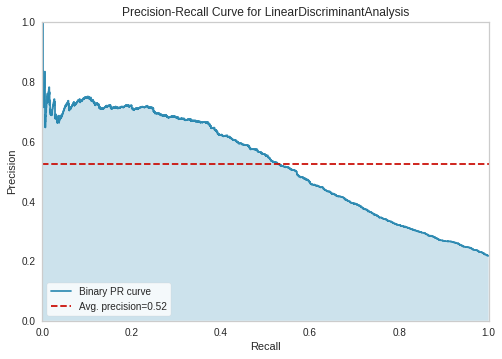

In [19]:
## PR曲線
plot_model(tuned_model, plot = 'pr')

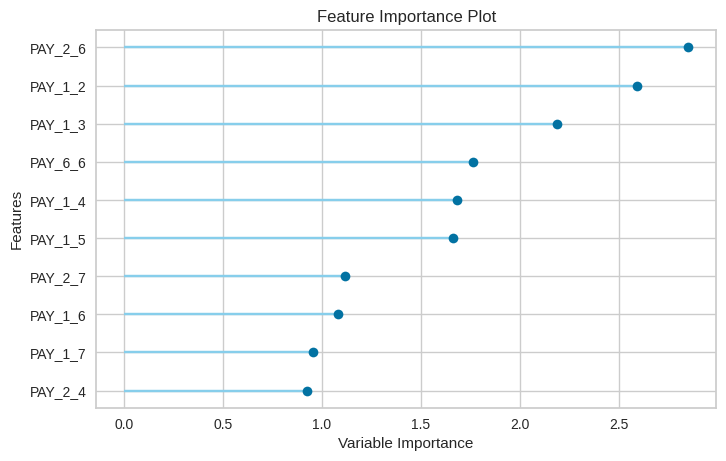

In [20]:
## 特徴量の重要度
plot_model(tuned_model, plot='feature')

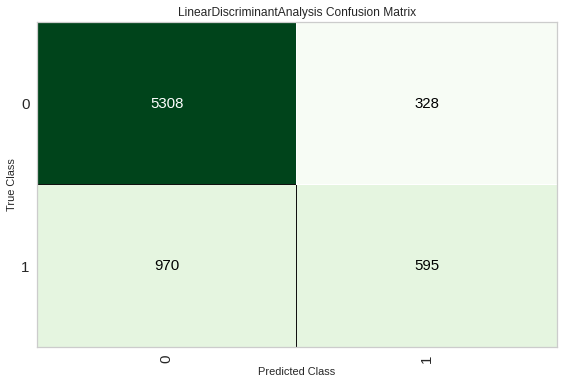

In [21]:
## 混同行列
plot_model(tuned_model, plot = 'confusion_matrix')